In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.float_format',lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')
from pyecharts.charts import *
from pyecharts import options as opts

In [2]:
df=pd.read_csv('./data/上海餐饮数据.csv')

In [3]:
df.head()

,类别,行政区,点评数,口味,环境,服务,人均消费,城市,Lng,Lat,Unnamed: 10,Unnamed: 11
0,烧烤,浦东新区,176,8.00,8.60,7.90,124,上海市,121.97,30.88,NaN,NaN
1,美食,闵行区,2,6.10,6.50,6.30,0,上海市,121.97,30.88,NaN,NaN
2,粤菜,浦东新区,141,6.70,7.20,6.60,141,上海市,121.93,30.89,NaN,NaN
3,海鲜,浦东新区,76,7.20,7.20,7.30,148,上海市,121.93,30.90,NaN,NaN
4,烧烤,浦东新区,600,7.20,7.60,7.00,143,上海市,121.93,30.90,NaN,NaN


## 数据处理

In [4]:
df=df.iloc[:,:-2]
df

,类别,行政区,点评数,口味,环境,服务,人均消费,城市,Lng,Lat
0,烧烤,浦东新区,176,8.00,8.60,7.90,124,上海市,121.97,30.88
1,美食,闵行区,2,6.10,6.50,6.30,0,上海市,121.97,30.88
2,粤菜,浦东新区,141,6.70,7.20,6.60,141,上海市,121.93,30.89
3,海鲜,浦东新区,76,7.20,7.20,7.30,148,上海市,121.93,30.90
4,烧烤,浦东新区,600,7.20,7.60,7.00,143,上海市,121.93,30.90
...,...,...,...,...,...,...,...,...,...,...
96393,快餐,黄浦区,14,7.10,7.20,7.30,0,上海市,109.56,18.24
96394,美食,嘉定区,2,7.30,7.40,7.40,0,上海市,107.56,30.61
96395,料理,闵行区,43,7.20,7.10,7.00,25,上海市,107.37,24.51
96396,甜点,普陀区,0,0.00,0.00,0.00,0,上海市,107.06,29.83


### 2.1异常值和空值处理

In [5]:
df.isnull().sum()

类别      140
行政区     143
点评数       0
口味        0
环境        0
服务        0
人均消费      0
城市        0
Lng       0
Lat       0
dtype: int64

In [6]:
df=df.dropna()

In [8]:
#检查各字段是否存在0值并清除
df.drop(df[(df==0).T.any()].index,inplace=True)
df=df.reset_index(drop=True)
df

,类别,行政区,点评数,口味,环境,服务,人均消费,城市,Lng,Lat
0,烧烤,浦东新区,176,8.00,8.60,7.90,124,上海市,121.97,30.88
1,粤菜,浦东新区,141,6.70,7.20,6.60,141,上海市,121.93,30.89
2,海鲜,浦东新区,76,7.20,7.20,7.30,148,上海市,121.93,30.90
3,烧烤,浦东新区,600,7.20,7.60,7.00,143,上海市,121.93,30.90
4,本菜,嘉定区,69,8.20,8.90,8.40,66,上海市,121.93,30.91
...,...,...,...,...,...,...,...,...,...,...
54873,浙菜,青浦区,169,7.70,7.00,7.40,76,上海市,120.90,31.09
54874,浙菜,青浦区,10,7.50,7.00,7.20,58,上海市,120.88,31.12
54875,亚菜,浦东新区,216,7.00,7.10,7.10,49,上海市,119.58,32.42
54876,甜点,黄浦区,218,8.20,7.90,8.10,33,上海市,114.16,22.28


- 查看评分字段数据分布情况

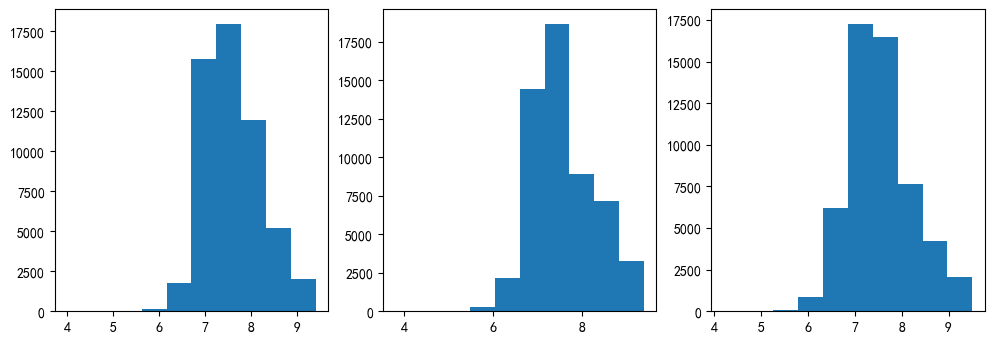

In [12]:
fig,axs=plt.subplots(1,3,figsize=(12,4),dpi=100)
df_list=['口味','环境','服务']
for i in range(len(axs)):
    ax=axs[i]
    ax.hist(df[df_list[i]])

- 查看人均消费箱型图

<AxesSubplot:>

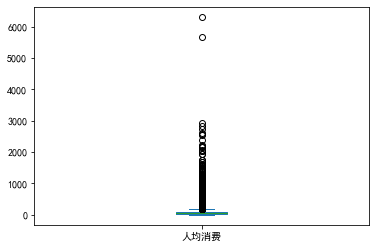

In [13]:
df['人均消费'].plot.box()

In [14]:
df['人均消费'].describe()

count   54878.00
mean       72.66
std       106.71
min         1.00
25%        24.00
50%        45.00
75%        87.00
max      6309.00
Name: 人均消费, dtype: float64

- 对人均消费较低和较高的记录删除


In [15]:
def f(data,col):
    q1=data[col].quantile(q=0.25)
    q3=data[col].quantile(q=0.75)
    iqr=q3-q1
    t1=q1-5*iqr
    t2=q3+5*iqr
    return data[(data[col]>t1)&(data[col]<t2)]

In [16]:
df=f(df,'人均消费')
df

,类别,行政区,点评数,口味,环境,服务,人均消费,城市,Lng,Lat
0,烧烤,浦东新区,176,8.00,8.60,7.90,124,上海市,121.97,30.88
1,粤菜,浦东新区,141,6.70,7.20,6.60,141,上海市,121.93,30.89
2,海鲜,浦东新区,76,7.20,7.20,7.30,148,上海市,121.93,30.90
3,烧烤,浦东新区,600,7.20,7.60,7.00,143,上海市,121.93,30.90
4,本菜,嘉定区,69,8.20,8.90,8.40,66,上海市,121.93,30.91
...,...,...,...,...,...,...,...,...,...,...
54873,浙菜,青浦区,169,7.70,7.00,7.40,76,上海市,120.90,31.09
54874,浙菜,青浦区,10,7.50,7.00,7.20,58,上海市,120.88,31.12
54875,亚菜,浦东新区,216,7.00,7.10,7.10,49,上海市,119.58,32.42
54876,甜点,黄浦区,218,8.20,7.90,8.10,33,上海市,114.16,22.28


## 餐饮品类竞争力分析

In [17]:
#计算性价比
df['性价比']=(df['口味']+df['环境']+df['服务'])/df['人均消费']
df.head()

,类别,行政区,点评数,口味,环境,服务,人均消费,城市,Lng,Lat,性价比
0,烧烤,浦东新区,176,8.00,8.60,7.90,124,上海市,121.97,30.88,0.20
1,粤菜,浦东新区,141,6.70,7.20,6.60,141,上海市,121.93,30.89,0.15
2,海鲜,浦东新区,76,7.20,7.20,7.30,148,上海市,121.93,30.90,0.15
3,烧烤,浦东新区,600,7.20,7.60,7.00,143,上海市,121.93,30.90,0.15
4,本菜,嘉定区,69,8.20,8.90,8.40,66,上海市,121.93,30.91,0.39


In [18]:
df_leibie=df.groupby('类别')['口味','环境','服务','人均消费','性价比'].mean()
df_leibie.head()

,口味,环境,服务,人均消费,性价比
类别,,,,,
亚菜,7.88,8.03,7.92,100.33,0.32
助餐,7.39,7.82,7.67,140.16,0.24
北菜,7.35,7.23,7.26,50.48,0.57
午茶,7.50,8.60,7.70,150.00,0.16
南菜,7.98,8.26,8.13,91.41,0.33


In [19]:
#计算餐饮行业综合评分
df_leibie['综合评分']=(df_leibie['口味']+df_leibie['环境']+df_leibie['服务'])/3

In [24]:
bar1=(
    Bar()
    .add_xaxis(df_leibie['综合评分'].index.tolist())
    .add_yaxis('综合评分',df_leibie['综合评分'].values.round(2).tolist())
    .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90)),
                     legend_opts=opts.LegendOpts(pos_left='40%')
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
)
bar2=(
    Bar()
    .add_xaxis(df_leibie['人均消费'].index.tolist())
    .add_yaxis('人均消费',df_leibie['人均消费'].values.round(2).tolist())
    .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90)),
                     legend_opts=opts.LegendOpts(pos_left='50%')
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
)
bar3=(
    Bar()
    .add_xaxis(df_leibie['性价比'].index.tolist())
    .add_yaxis('性价比',df_leibie['性价比'].values.round(2).tolist())
    .set_global_opts(xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=-90)),
                     legend_opts=opts.LegendOpts(pos_left='60%')
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
)
grid=(
    Grid()
    .add(bar1,grid_opts=opts.GridOpts(pos_bottom='70%'))
    .add(bar2,grid_opts=opts.GridOpts(pos_top='40%',pos_bottom='40%'))
    .add(bar3,grid_opts=opts.GridOpts(pos_top='70%'))
)
grid.render_notebook()

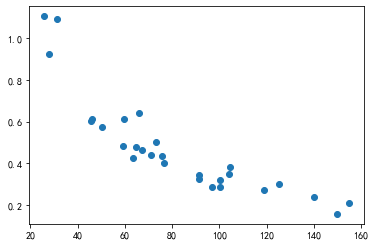

In [25]:
#人均消费与性价比之间的关系
plt.scatter(df_leibie['人均消费'],df_leibie['性价比'])

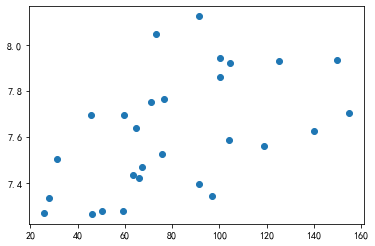

In [26]:
#人均消费与得分之间的关系
plt.scatter(df_leibie['人均消费'],df_leibie['综合评分'])

- 将数据进行标准化处理之后，按照综合评分：人均消费：性价比=2：3：5 比例进行计算

In [27]:
df_leibie=df_leibie[['人均消费','性价比','综合评分']]
df_leibie=(df_leibie-df_leibie.min())/(df_leibie.max()-df_leibie.min())
df_leibie['分数']=0.2*df_leibie['综合评分']+0.3*df_leibie['人均消费']+0.5*df_leibie['性价比']
df_leibie.sort_values('分数',ascending=False)

,人均消费,性价比,综合评分,分数
类别,,,,
甜点,0.04,0.99,0.28,0.56
快餐,0.00,1.00,0.01,0.50
素菜,0.37,0.36,0.91,0.47
本菜,0.77,0.15,0.77,0.46
西餐,0.61,0.24,0.76,0.45
午茶,0.96,0.00,0.78,0.44
南菜,0.51,0.18,1.00,0.44
蟹宴,1.00,0.05,0.51,0.43
面馆,0.02,0.81,0.08,0.42


## 地区竞争力分析

<AxesSubplot:ylabel='行政区'>

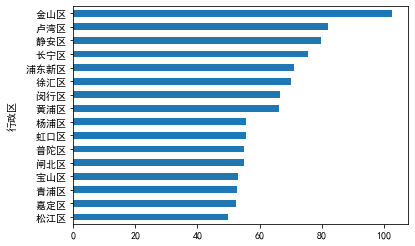

In [29]:
#各地区人均消费水平
df_area=df.groupby('行政区')['人均消费'].mean().sort_values(ascending=True)
df_area.plot.barh()

In [32]:
df['综合评分']=(df['口味']+df['环境']+df['服务'])/3
df['评价']=df['综合评分'].apply(lambda x :'好评' if x>=8.5 else '一般' if x>=6.5 else'不满意')

In [38]:
df_pivot=pd.pivot_table(df,index='行政区',columns='评价',values='口味',aggfunc='count',fill_value=0)

In [41]:
df_pivot['总和']=df_pivot.sum(axis=1)
df_pivot

评价,一般,不满意,好评,总和
行政区,,,,
卢湾区,2132,57,432,2621.00
嘉定区,2704,49,146,2899.00
宝山区,3198,77,206,3481.00
徐汇区,4034,111,615,4760.00
普陀区,2869,80,232,3181.00
杨浦区,3057,76,358,3491.00
松江区,2838,37,163,3038.00
浦东新区,7399,152,788,8339.00
虹口区,2248,55,167,2470.00


In [42]:
df_pivot['好评率']=round(df_pivot['好评']/df_pivot['总和'],3)*100

<AxesSubplot:ylabel='行政区'>

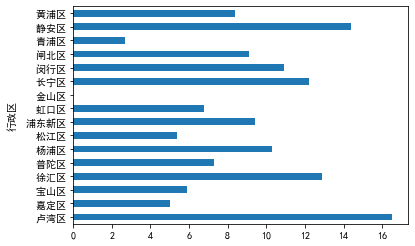

In [44]:
df_pivot['好评率'].plot.barh()

<AxesSubplot:ylabel='行政区'>

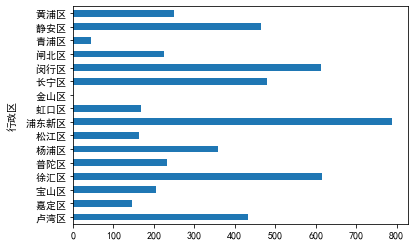

In [45]:
df_pivot['好评'].plot.barh()

## 甜品店在上海各行政区的分布情况

In [47]:
df_tianpin=df[df['类别']=='甜点']['行政区'].value_counts()
df_tianpin

 浦东新区    899
 徐汇区     850
 闵行区     849
 长宁区     695
 杨浦区     671
 宝山区     658
 普陀区     643
 静安区     628
 黄浦区     605
 松江区     600
 嘉定区     557
 卢湾区     508
 闸北区     481
 虹口区     462
 青浦区     318
Name: 行政区, dtype: int64

In [51]:
districts=df_tianpin.index.str.strip() #去掉空格
pie1=(
    Pie()
    .add("",[list(z) for z in zip(districts,df_tianpin.values.tolist())],
        radius=["30%",'70%'],
        center=['30%','50%'],
        rosetype='area')
    .set_global_opts(title_opts=opts.TitleOpts(title='甜品店分布情况'),
                    legend_opts=opts.LegendOpts(is_show=False))
)
pie1.render_notebook()

- 甜品店的人均消费

In [52]:
df_tianpin1=df[df['类别']=='甜点'].groupby('行政区')['人均消费'].mean()
df_tianpin1

行政区
 卢湾区    43.76
 嘉定区    26.22
 宝山区    27.29
 徐汇区    33.82
 普陀区    28.21
 杨浦区    27.52
 松江区    22.17
 浦东新区   35.33
 虹口区    28.76
 长宁区    32.49
 闵行区    33.62
 闸北区    27.24
 青浦区    28.14
 静安区    35.87
 黄浦区    32.91
Name: 人均消费, dtype: float64

In [55]:
map1=(
    Map()
    .add('',[list(z) for z in zip(df_tianpin1.index.str.strip(),df_tianpin1.values.tolist())],
        maptype='上海',is_roam=False,label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='上海甜品店人均消费金额'),visualmap_opts=opts.VisualMapOpts(max_=50,is_piecewise=True)
    )
)
map1.render_notebook()